In [1]:
%connect_info

{"key":"f9198a6c-0e4e-42c6-a67c-6be6ae9832ef","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9005,"control_port":9006,"shell_port":9007,"stdin_port":9008,"iopub_port":9009,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v3982ba44eb75fd5e676aa66c8cd750889e9b74379.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

%load_ext IPython.extensions.autoreload
%autoreload 2

from hypyp.wavelet.pywavelets_wavelet import PywaveletsWavelet
from hypyp.wavelet.scipy_wavelet import ScipyWavelet
from hypyp.signal import SynteticSignal



integration: 18.8279144825918


/tmp/ipykernel_151124/3173887835.py:5: DeprecationWarning: scipy.signal.morlet2 is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  wavelet = scipy.signal.morlet2(M, s, w)


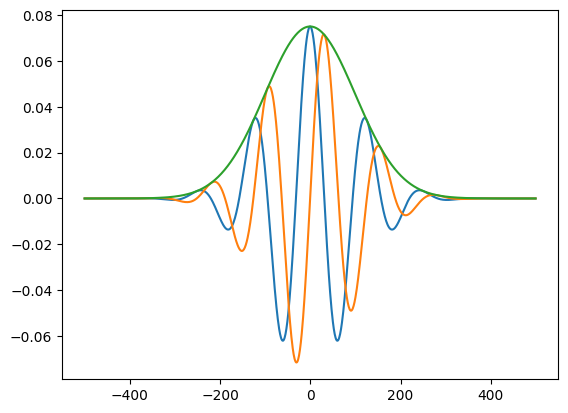

In [3]:
import scipy.signal
M = 1000
s = 100.0
w = 5.0
wavelet = scipy.signal.morlet2(M, s, w)

x = np.arange(M) - M//2

integration = np.sum(np.abs(wavelet)) * (x[1] - x[0])
print(f'integration: {integration}')

plt.plot(x, np.real(wavelet))
plt.plot(x, np.imag(wavelet))
plt.plot(x, np.abs(wavelet))

plt.show()

/tmp/ipykernel_151124/1566630312.py:9: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  W = scipy.signal.cwt(sig, scipy.signal.morlet2, widths, w=w)


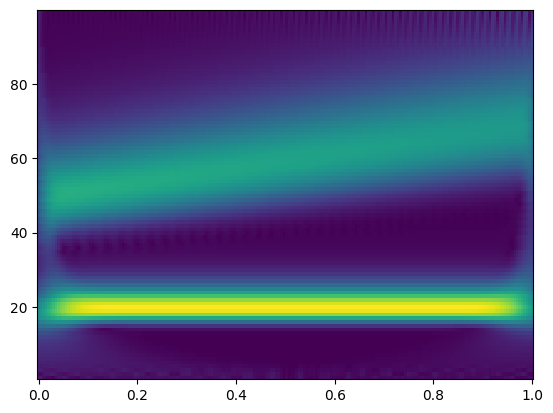

In [4]:
t, dt = np.linspace(0, 1, 200, retstep=True)
fs = 1/dt
w = 6.
sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)

freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)

W = scipy.signal.cwt(sig, scipy.signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(W))
plt.show()

Creating RawArray with float64 data, n_channels=5, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.


Used Annotations descriptions: ['1', '2', '3', '4']
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1 events and 301 original time points ...
0 bad epochs dropped
Using matplotlib as 2D backend.
Using data from preloaded Raw for 1 events and 301 original time points ...


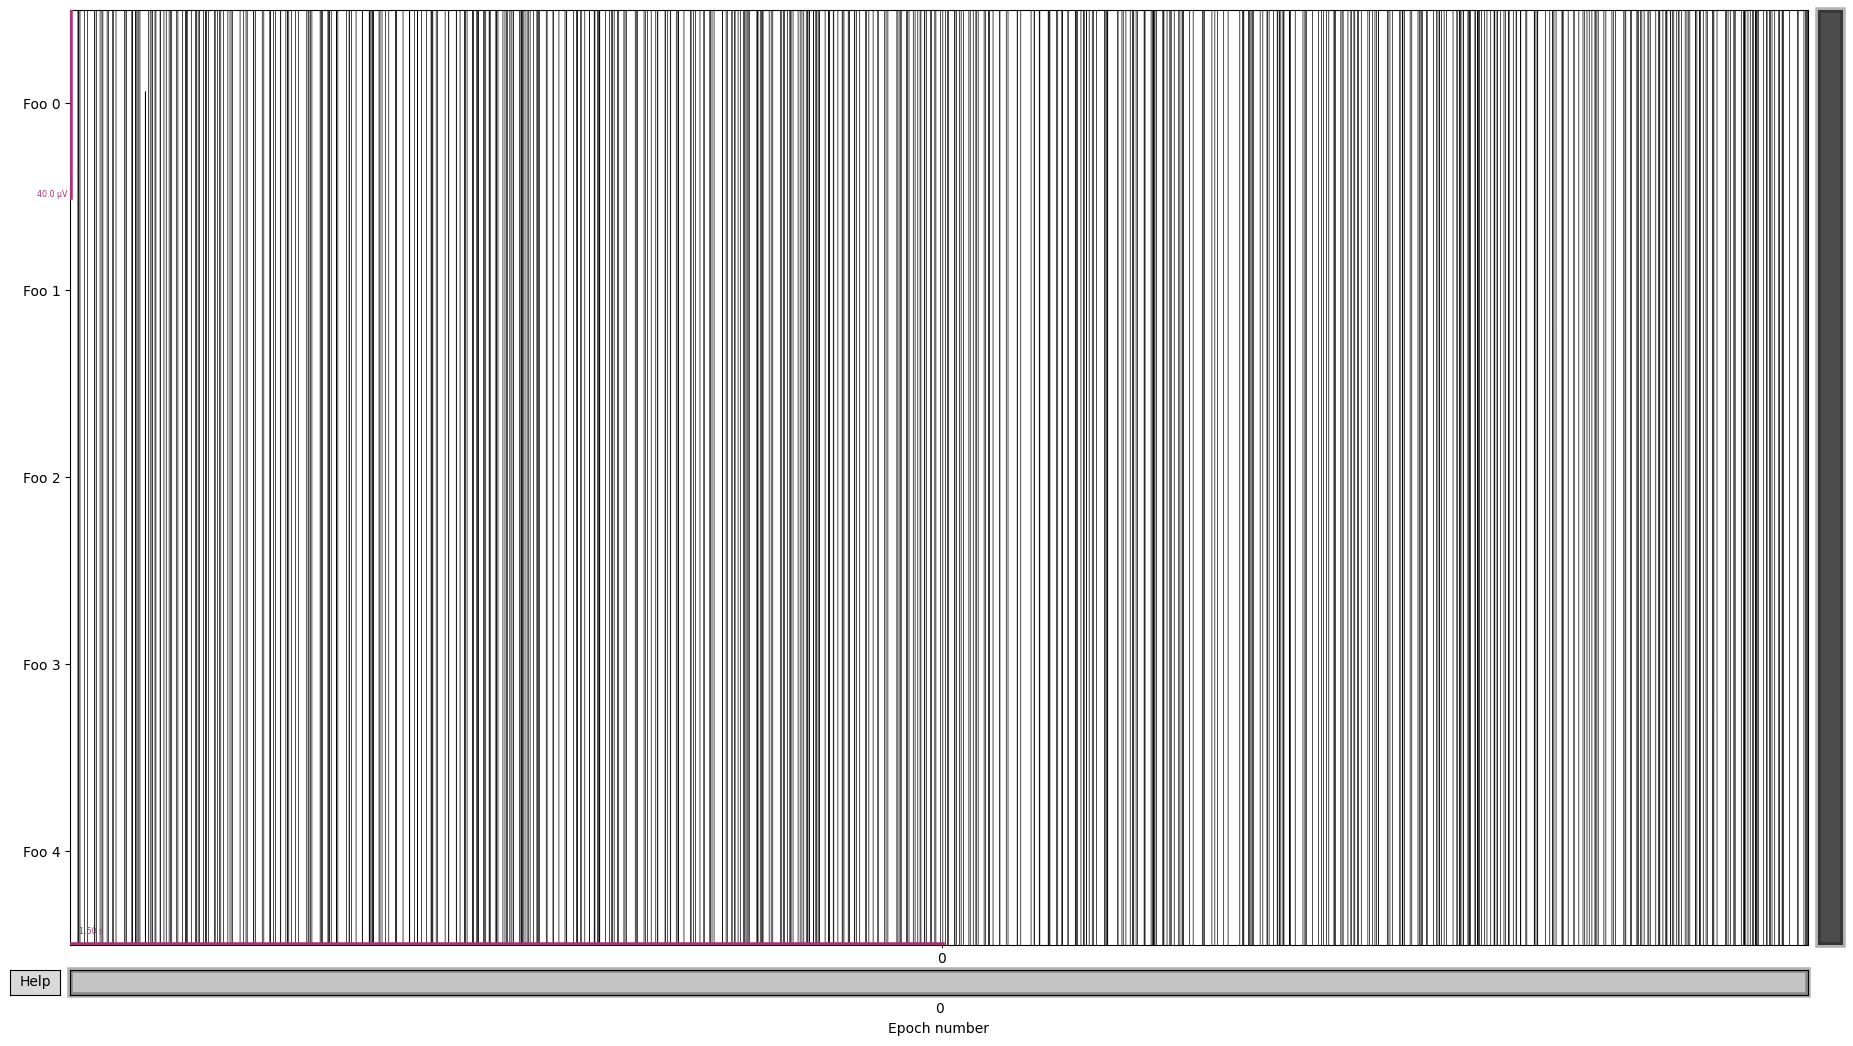

Using data from preloaded Raw for 1 events and 101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 101 original time points ...


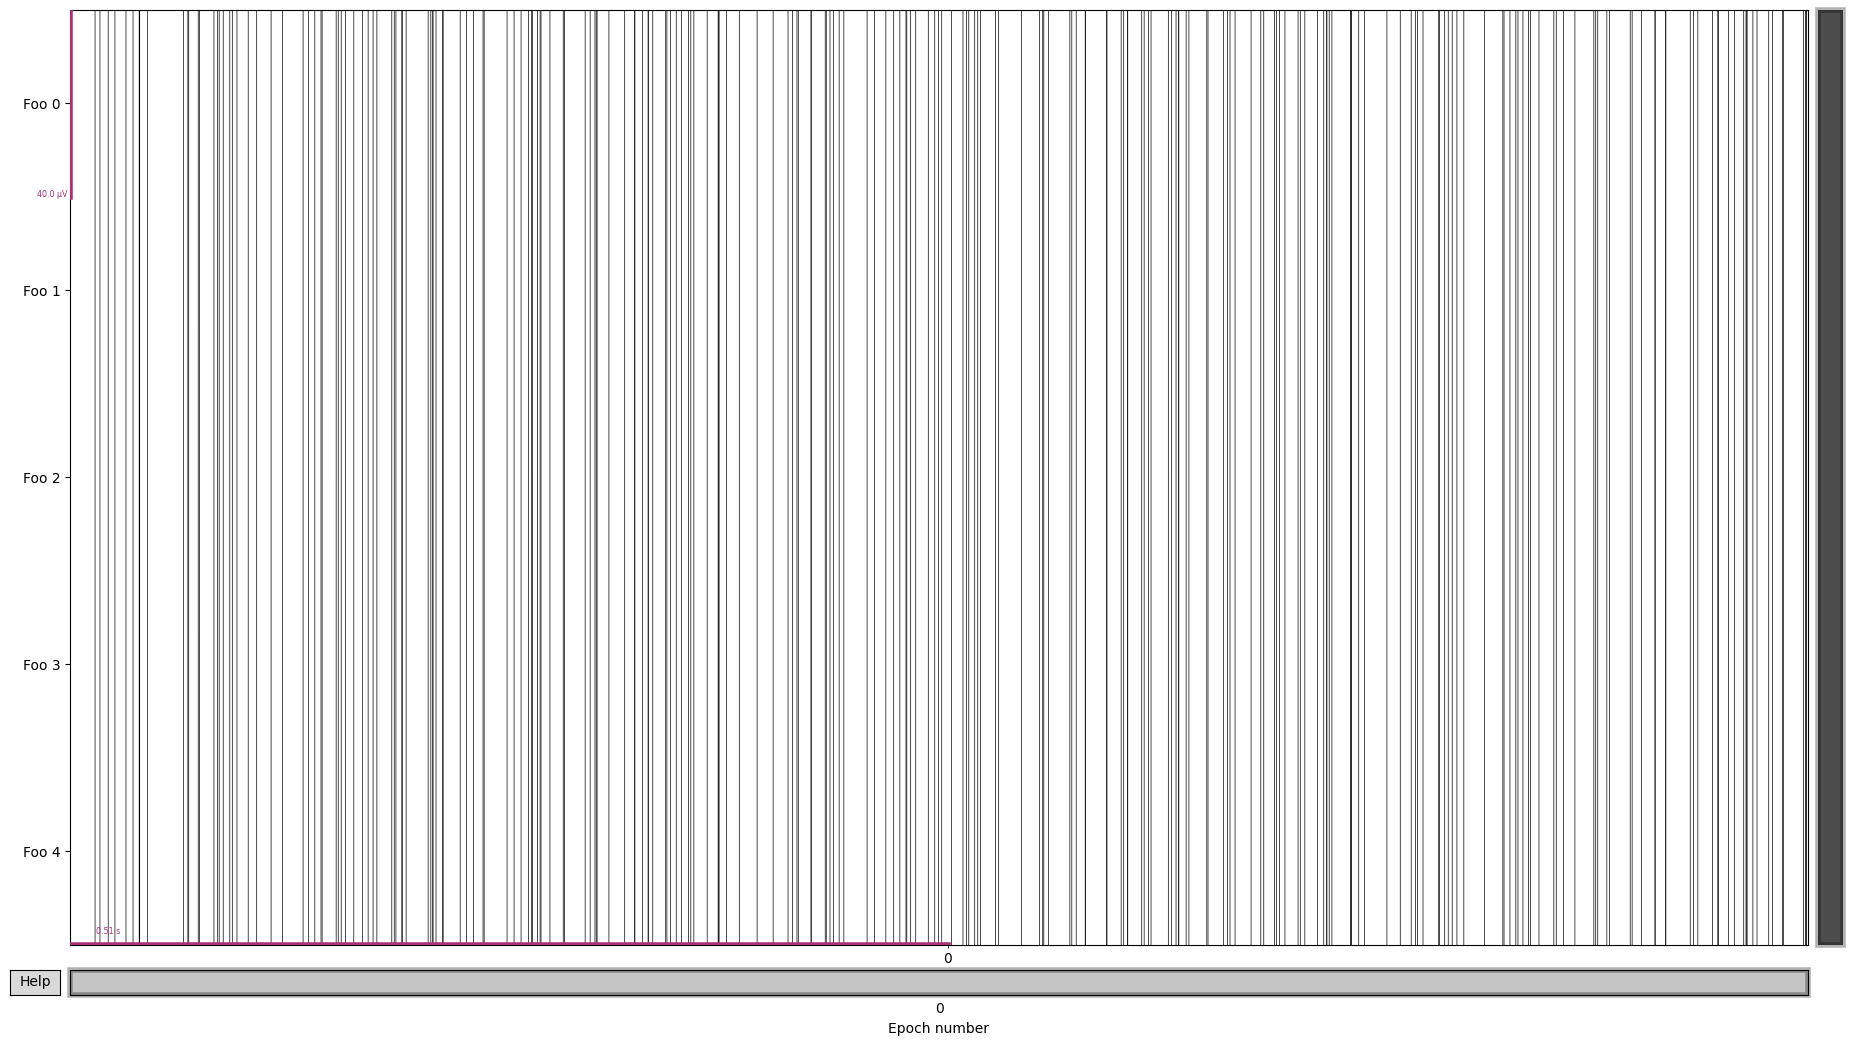

In [ ]:
import mne
from hypyp import utils

sfreq = 100
duration = 10
n_channels = 5
n_samples = int(sfreq * duration)
data = np.random.randn(n_channels, n_samples)

ch_names = [f'Foo {i}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data, info)

# Define events using annotations (e.g., at 2s, 5s, and 8s with a duration of 0s)
onsets = [2, 5, 8, 9]  # in seconds
durations = [0, 0, 0, 0]  # duration of each event
annotations = mne.Annotations(onset=onsets, duration=durations, description=np.arange(1, len(onsets)+1))
raw.set_annotations(annotations)

tasks = [
    ('task1', 1, 2),
    ('task2', 3, 4),
]

all_epochs = utils.epochs_from_tasks(raw, tasks)
